In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("TRAIN1.csv", index_col = 0)
df.head(2)

cut color clarity  depth  table     x     y     z  price  \
carat                                                                 
0.30   Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353   
1.01     Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183   

       cut_encoded  color_encoded  clarity_encoded  
carat                                               
0.30             1              5                0  
1.01             4              6                5

In [14]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [15]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [16]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [17]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 13.8 µs


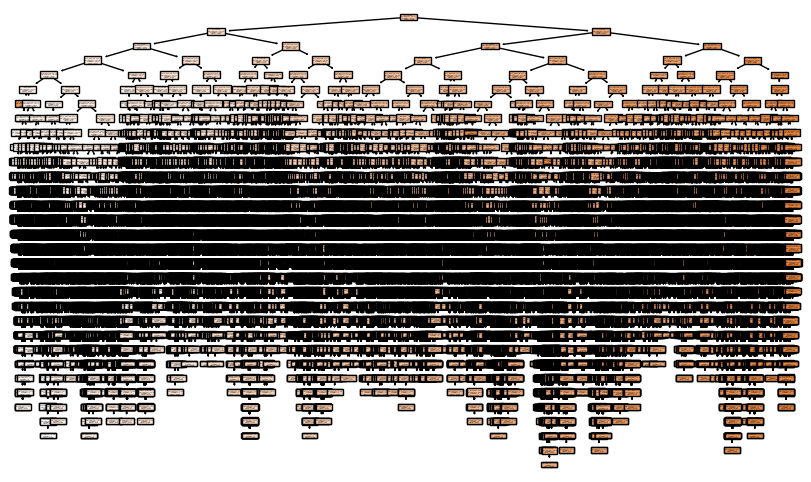

In [18]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [19]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [20]:
# max depth

print(regressor.tree_.max_depth)

31


In [21]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [23]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [24]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

MAE       MSE      RMSE        R2    set            modelo
0  0.091860  0.018044  0.134328  0.982331   test  Decission Tree I
1  0.000224  0.000017  0.004178  0.999983  train  Decission Tree I

In [25]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [26]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 8 µs, sys: 14 µs, total: 22 µs
Wall time: 59.1 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.260, test=-0.261) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.658, test=-0.659) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.126, test=-0.125) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.193, test=-0.194) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.683, test=-0.714) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.879, test=-0.886) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.260, test=-0.268) total time=   0.0s
[CV 8/10] END max_depth=4, max_feature

[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.066, test=-0.064) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.084, test=-0.086) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.062, test=-0.068) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.113, test=-0.110) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.060, test=-0.058) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.074, test=-0.079) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.064, test=-0.065) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.063, test=-0.062) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, mi

[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.060, test=-0.061) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.062, test=-0.064) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.066, test=-0.071) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.062, test=-0.059) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.062, test=-0.067) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.057, test=-0.057) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.056, test=-0.056) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6

[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.062, test=-0.063) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.078, test=-0.077) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.145, test=-0.146) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.055, test=-0.055) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.050, test=-0.052) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.075, test=-0.079) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.058, test=-0.062) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.077, test=-0.080) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_s

[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.051, test=-0.050) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.048, test=-0.049) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.051, test=-0.051) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.046, test=-0.045) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.053, test=-0.056) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.050, test=-0.051) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.055, test=-0.062) total time=   0.0s
[CV 1/10] END max_depth=5, max_features

[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.153, test=-0.162) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.143, test=-0.143) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.062, test=-0.064) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.130, test=-0.136) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.176, test=-0.177) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.117, test=-0.117) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.073, test=-0.077) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=50;, score=(train=-0.054, test=-0.055) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_

[CV 5/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.045, test=-0.046) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.040, test=-0.040) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.045, test=-0.047) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.040, test=-0.039) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.041, test=-0.047) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.040, test=-0.042) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=100;, score=(train=-0.039, test=-0.040) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, mi

[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.041, test=-0.041) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.036, test=-0.038) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.036, test=-0.036) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.036, test=-0.043) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.032, test=-0.031) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=6, min_samples_split=10;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=6

[CV 4/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.038, test=-0.038) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.044, test=-0.047) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.064, test=-0.067) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.050, test=-0.057) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.042, test=-0.044) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.033, test=-0.034) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.037, test=-0.045) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=100;, score=(train=-0.048, test=-0.049) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min

[CV 9/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.033, test=-0.035) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.028) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.027, test=-0.026) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.025, test=-0.029) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=5, min_samples_split=10;, score=(train=-0.026, test=-0.028) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=5, mi

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [27]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=50)

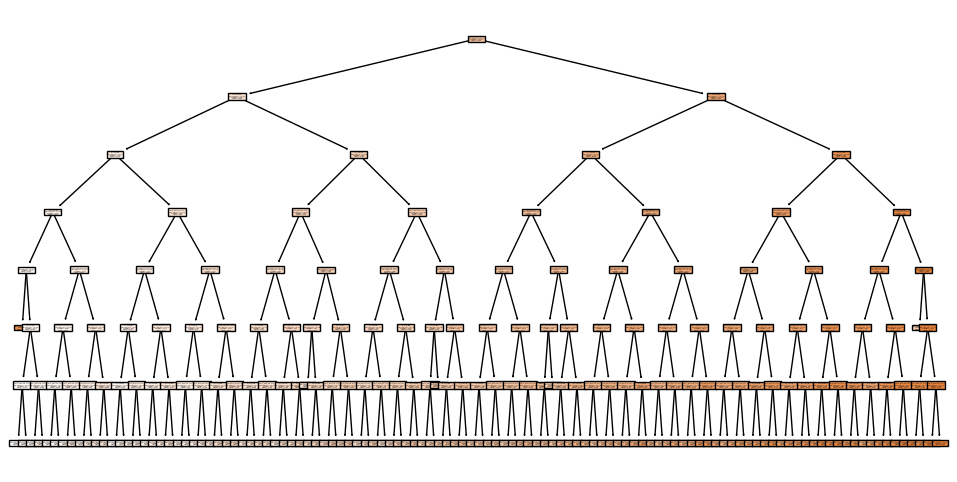

In [28]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [30]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [31]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.61
|   |--- x <= 4.92
|   |   |--- y <= 4.60
|   |   |   |--- x <= 4.30
|   |   |   |   |--- z <= 1.13
|   |   |   |   |   |--- value: [9.37]
|   |   |   |   |--- z >  1.13
|   |   |   |   |   |--- x <= 4.10
|   |   |   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |   |   |--- value: [6.07]
|   |   |   |   |   |   |--- clarity_encoded >  4.50
|   |   |   |   |   |   |   |--- value: [6.29]
|   |   |   |   |   |--- x >  4.10
|   |   |   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |   |   |--- value: [6.28]
|   |   |   |   |   |   |--- clarity_encoded >  4.50
|   |   |   |   |   |   |   |--- value: [6.53]
|   |   |   |--- x >  4.30
|   |   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.20]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.33]
|   |   |   |   |   |--- c

In [32]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [33]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [34]:
dt_results2

MAE       MSE      RMSE        R2    set            modelo
0  0.123607  0.026071  0.161464  0.974472   test  Decision tree II
1  0.122053  0.024833  0.157586  0.976054  train  Decision tree II

# prueba predicciones 

In [35]:
df = pd.read_csv("realidad.csv", index_col = 0)
X_realida = df.drop(['cut', 'color', 'clarity'], axis=1)
c.head(2)

depth  table     x     y     z  cut_encoded  color_encoded  \
carat                                                               
0.32    60.5   58.0  4.43  4.49  2.70            4              1   
1.24    62.9   60.0  6.80  6.74  4.26            1              1   

       clarity_encoded  
carat                   
0.32                 2  
1.24                 2

In [48]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.20211191, 8.42552654, 9.38000949, ..., 6.62536024, 8.91577143,
       7.86100956])

In [49]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

id     price
0          0  6.202112
1          1  8.425527
2          2  9.380009
3          3  7.732747
4          4  8.750822
...      ...       ...
13480  13480  8.572859
13481  13481  8.377553
13482  13482  6.625360
13483  13483  8.915771
13484  13484  7.861010

[13485 rows x 2 columns]